In [3]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [4]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
base = automap_base()
# reflect the tables
base.prepare(engine, reflect=True)

C:\Users\scott_p9qjqkt\AppData\Local\Temp\ipykernel_24580\1895431338.py:4: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  base.prepare(engine, reflect=True)


In [6]:
# View all of the classes that automap found


['measurement', 'station']

In [10]:
base.classes.keys()

['measurement', 'station']

In [12]:
# Save references to each table
tables = {}
for table_name in base.classes.keys():
    tables[table_name] = getattr(base.classes, table_name)
measurement_table = tables.get('measurement')
station_table = tables.get('station')

In [14]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.


('2017-08-23',)

In [18]:
recent_date = session.query(func.max(measurement_table.date)).scalar()
recent_date

'2017-08-23'

Text(0, 0.5, 'Inches')

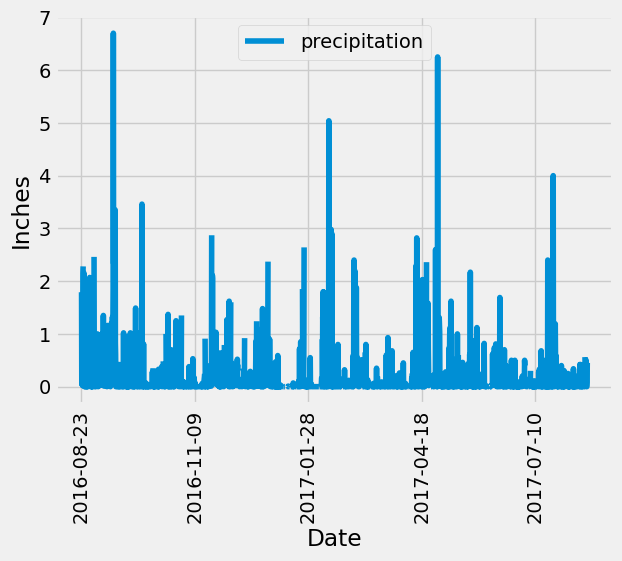

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame. Explicitly set the column names


# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data


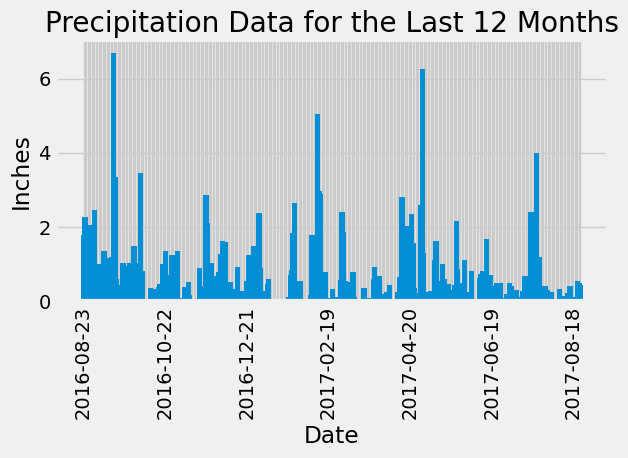

In [64]:
latest_date = session.query(func.max(measurement_table.date)).scalar()

latest_date = pd.to_datetime(latest_date)

one_year_ago = latest_date - pd.DateOffset(days=365)

latest_date_str = latest_date.strftime('%Y-%m-%d')
one_year_ago_str = one_year_ago.strftime('%Y-%m-%d')

query_results = session.query(measurement_table.date, measurement_table.prcp) \
    .filter(measurement_table.date >= one_year_ago_str) \
    .filter(measurement_table.date <= latest_date_str) \
    .order_by(measurement_table.date) \
    .all()

df = pd.DataFrame(query_results, columns=['Date', 'Precipitation'])

df = df.sort_values('Date')

plt.style.use('fivethirtyeight')


plt.bar(df['Date'], df['Precipitation'], width=4)
plt.xlabel('Date')
plt.ylabel('Inches')
plt.title('Precipitation Data for the Last 12 Months')
plt.xticks(rotation=90)
for i, tick in enumerate(plt.gca().xaxis.get_ticklabels()):
    if i % 60 != 0:
        tick.set_visible(False)
plt.tight_layout()
plt.show()

In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data


,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [61]:
summary_stat = df['Precipitation'].describe().to_frame()
summary_stat

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset


[(9,)]

In [63]:
total_stations = session.query(func.count(station_table.station)).scalar()
total_stations

9

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [67]:
active_stations = session.query(measurement_table.station, func.count(measurement_table.station)) \
    .group_by(measurement_table.station) \
    .order_by(func.count(measurement_table.station).desc()) \
    .all()

active_stations


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


[(54.0, 85.0, 71.66378066378067)]

In [68]:
most_active_station_id = 'USC00519281'  

temperature_stats = session.query(func.min(measurement_table.tobs),
                                 func.max(measurement_table.tobs),
                                 func.avg(measurement_table.tobs)) \
    .filter(measurement_table.station == most_active_station_id) \
    .all()

lowest_temp, highest_temp, avg_temp = temperature_stats[0]

print(f"Lowest Temperature: {lowest_temp} F")
print(f"Highest Temperature: {highest_temp} F")
print(f"Average Temperature: {avg_temp:.2f} F")


Lowest Temperature: 54.0 F
Highest Temperature: 85.0 F
Average Temperature: 71.66 F


Text(0.5, 4.183333333333314, 'Temperature')

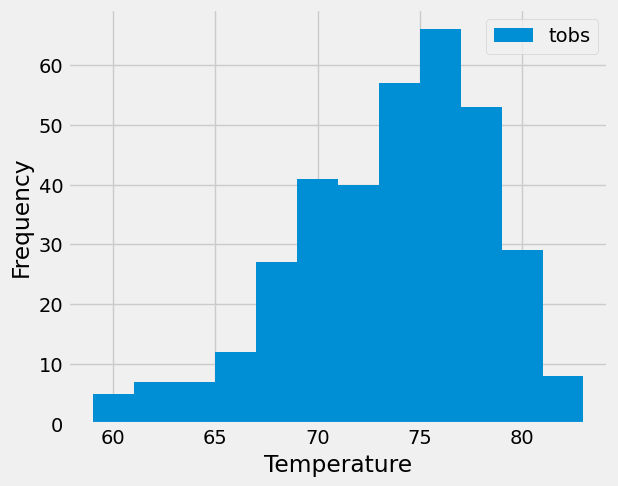

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


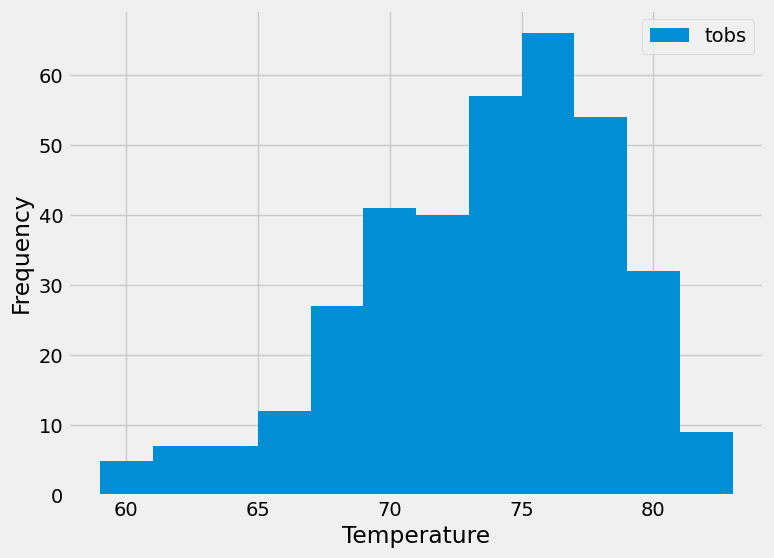

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import func

most_active_station_id = 'USC00519281'

latest_date = session.query(func.max(measurement_table.date)).filter(measurement_table.station == most_active_station_id).scalar()
latest_date = pd.to_datetime(latest_date)
one_year_ago = latest_date - pd.DateOffset(days=365)

latest_date_str = latest_date.strftime('%Y-%m-%d')
one_year_ago_str = one_year_ago.strftime('%Y-%m-%d')

temperature_data = session.query(measurement_table.date, measurement_table.tobs) \
    .filter(measurement_table.station == most_active_station_id) \
    .filter(measurement_table.date >= one_year_ago_str) \
    .all()

df = pd.DataFrame(temperature_data, columns=['Date', 'Temperature'])

plt.figure(figsize=(8, 6))
plt.hist(df['Temperature'], bins=12, label = 'tobs')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend()
plt.show()



# Close Session

In [78]:
# Close Session
session.close()